# Part 1: About neural data

In [1]:
import mne
import matplotlib.pyplot as plt
import mne.viz

import numpy as np
from scipy.stats import ttest_ind
import copy

## Loading the data and the Epochs object

First we load the .fif file containing the epoched EEG recording of participant 902. 

In [2]:
data_file = '902-P'

In [3]:
epochs = mne.read_epochs(data_file + '.fif', verbose='error')

In [4]:
epochs

Number of events,154
Events,Novel: 27Standard: 127
Time range,-0.100 – 0.500 sec
Baseline,-0.100 – 0.000 sec


The output of epochs tells us, that we have 154 events, i.e. single trials. Out of which 27 are called *Novel* and 127 *Standard*. This data is from a patient exposed to two different types of audtiory stimulations. 
We can get all of the trials for the *Standard* condition with:

In [5]:
epochs['Standard']

Number of events,127
Events,Standard: 127
Time range,-0.100 – 0.500 sec
Baseline,-0.100 – 0.000 sec


The epoch datastructure of mne has an attribute '[info](https://mne.tools/stable/generated/mne.Info.html#mne.Info)', containing information on the sample frequency, the names of the electrodes, filtering information, etc.

In [6]:
epochs.info

<Info | 11 non-empty values
 bads: 2 items (PO8, O2)
 ch_names: Fp1, Fz, F3, F7, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, O1, Oz, ...
 chs: 60 EEG
 custom_ref_applied: False
 dig: 60 items (60 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 20.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 60
 projs: []
 sfreq: 500.0 Hz
>

We find for example the sample frequecy as follows:

In [7]:
sfreq = epochs.info['sfreq']
print(f'The smaple frequency is {sfreq} Hz')

The smaple frequency is 500.0 Hz


And the recorded channels / electrodes  with:

In [8]:
ch_names = epochs.info['ch_names']
print(f'The recording contains the following channels: {ch_names}')

The recording contains the following channels: ['Fp1', 'Fz', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'CPz']


### Exercise 1:

How many electrodes were recorded? 

**Tip:** Either take the length of ch_names, or check the epochs.info above.

What is the index of 'Cz'? 

**Tip**: Define channel_Cz such that: ch_names[channel_Cz] = 'Cz'.

In [9]:
# solution
nchan = len(ch_names)
print(f'The recording contains {nchan} channels')

channel_Cz = ch_names.index('Cz')
print(f"Cz is the {channel_Cz}'s channel, as ch_names[channel_Cz] = {ch_names[channel_Cz]}")

The recording contains 60 channels
Cz is the 20's channel, as ch_names[channel_Cz] = Cz


The epochs object also gives you a numpy array with all the collected timepoint per trial

In [10]:
times = epochs.times
print(times)

[-0.1   -0.098 -0.096 -0.094 -0.092 -0.09  -0.088 -0.086 -0.084 -0.082
 -0.08  -0.078 -0.076 -0.074 -0.072 -0.07  -0.068 -0.066 -0.064 -0.062
 -0.06  -0.058 -0.056 -0.054 -0.052 -0.05  -0.048 -0.046 -0.044 -0.042
 -0.04  -0.038 -0.036 -0.034 -0.032 -0.03  -0.028 -0.026 -0.024 -0.022
 -0.02  -0.018 -0.016 -0.014 -0.012 -0.01  -0.008 -0.006 -0.004 -0.002
  0.     0.002  0.004  0.006  0.008  0.01   0.012  0.014  0.016  0.018
  0.02   0.022  0.024  0.026  0.028  0.03   0.032  0.034  0.036  0.038
  0.04   0.042  0.044  0.046  0.048  0.05   0.052  0.054  0.056  0.058
  0.06   0.062  0.064  0.066  0.068  0.07   0.072  0.074  0.076  0.078
  0.08   0.082  0.084  0.086  0.088  0.09   0.092  0.094  0.096  0.098
  0.1    0.102  0.104  0.106  0.108  0.11   0.112  0.114  0.116  0.118
  0.12   0.122  0.124  0.126  0.128  0.13   0.132  0.134  0.136  0.138
  0.14   0.142  0.144  0.146  0.148  0.15   0.152  0.154  0.156  0.158
  0.16   0.162  0.164  0.166  0.168  0.17   0.172  0.174  0.176  0.178
  0.18

You can find additional information for the epochs object here: [Epoch](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs)

Now we will look at how to extract the data and some of the functions provided by mne for plotting

In [11]:
data = epochs.get_data()

The data object is 3 dimensional.
### Exercise 2:
In what order are the dimensions time, channels and number of trials stored in the epochs object?

In [12]:
# solution
print(nchan)
print(len(times))
print(data.shape)

print('The data has the shape: Trials x Channels x Time points')

60
301
(154, 60, 301)
The data has the shape: Trials x Channels x Time points


We can plot some single-trail exemplar traces for electrode 0 with the following code snippet:

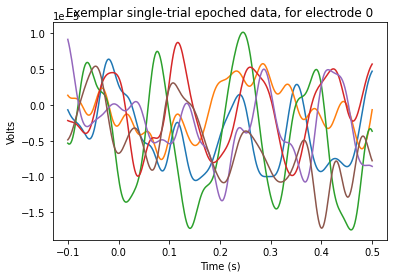

In [13]:
plt.plot(times, data[14:20,0,:].T)
plt.title("Exemplar single-trial epoched data, for electrode 0")
plt.ylabel('Volts')
plt.xlabel('Time (s)')
plt.show()

### Exercise 3:
Plot the last 5 single-trial traces for electrode Cz

**Tipp**: We found out above at which index the electrode Cz is located at (Exercise 1)

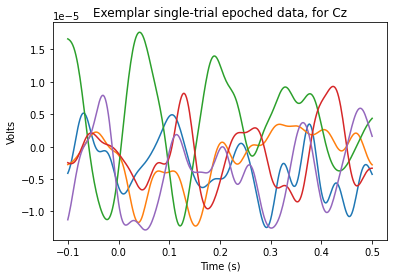

In [14]:
# solution
plt.plot(times, data[-5:,channel_Cz,:].T)
plt.title("Exemplar single-trial epoched data, for Cz")
plt.ylabel('Volts')
plt.xlabel('Time (s)')
plt.show()

## The Evoked Object

In neuroscience we oftentime represent the data as averages over multiple trials. In this way we get rid of background noise and can see a neural response clearer. In mne this object is called 'evoked' and can be generated with epochs.average():

In [15]:
evoked = epochs.average()

In [16]:
evoked_data = evoked._data
shape_evoked = evoked_data.shape
print(f'The evoked has the shape: {shape_evoked} (Channels x Times)')

The evoked has the shape: (60, 301) (Channels x Times)


### Exercise 4:

1st plot the evoked trace for electrode Cz and then the averaged traces for all channels simultaneously

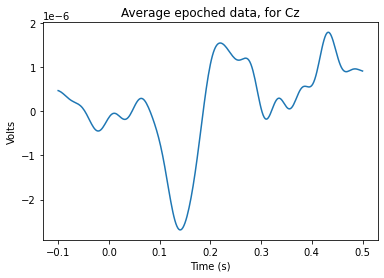

In [17]:
# solution
plt.plot(times, evoked_data[channel_Cz,:].T)
plt.title("Average epoched data, for Cz")
plt.ylabel('Volts')
plt.xlabel('Time (s)')
plt.show()

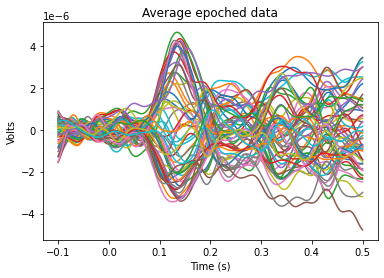

In [18]:
# solution
plt.plot(times, evoked_data.T)
plt.title("Average epoched data")
plt.ylabel('Volts')
plt.xlabel('Time (s)')
plt.show()

This can be done easier with a function from mne:

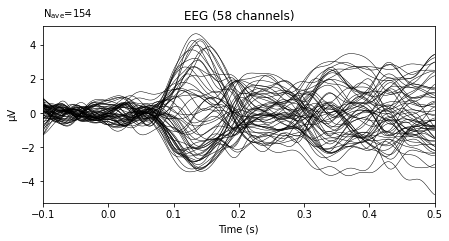

In [19]:
evoked.plot();

### Exercise 5:
Plot the averaged traces for both conditions available in the data (*Standard* & *Novel*). These types of figures are called ERP's (event-related potential)

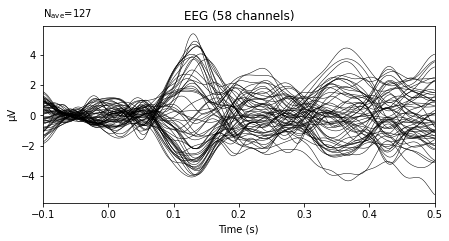

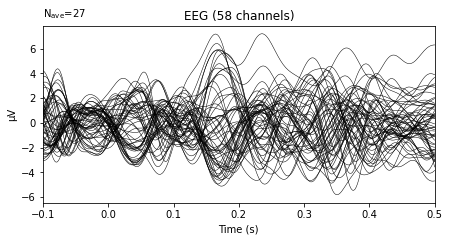

In [20]:
# solution
epochs['Standard'].average().plot();
epochs['Novel'].average().plot();

### Exercise 6:
With matplotlib (as in Exercise 4) plot at the Cz electrode the traces for both conditions (*Standard* and *Novel*) in the same graph

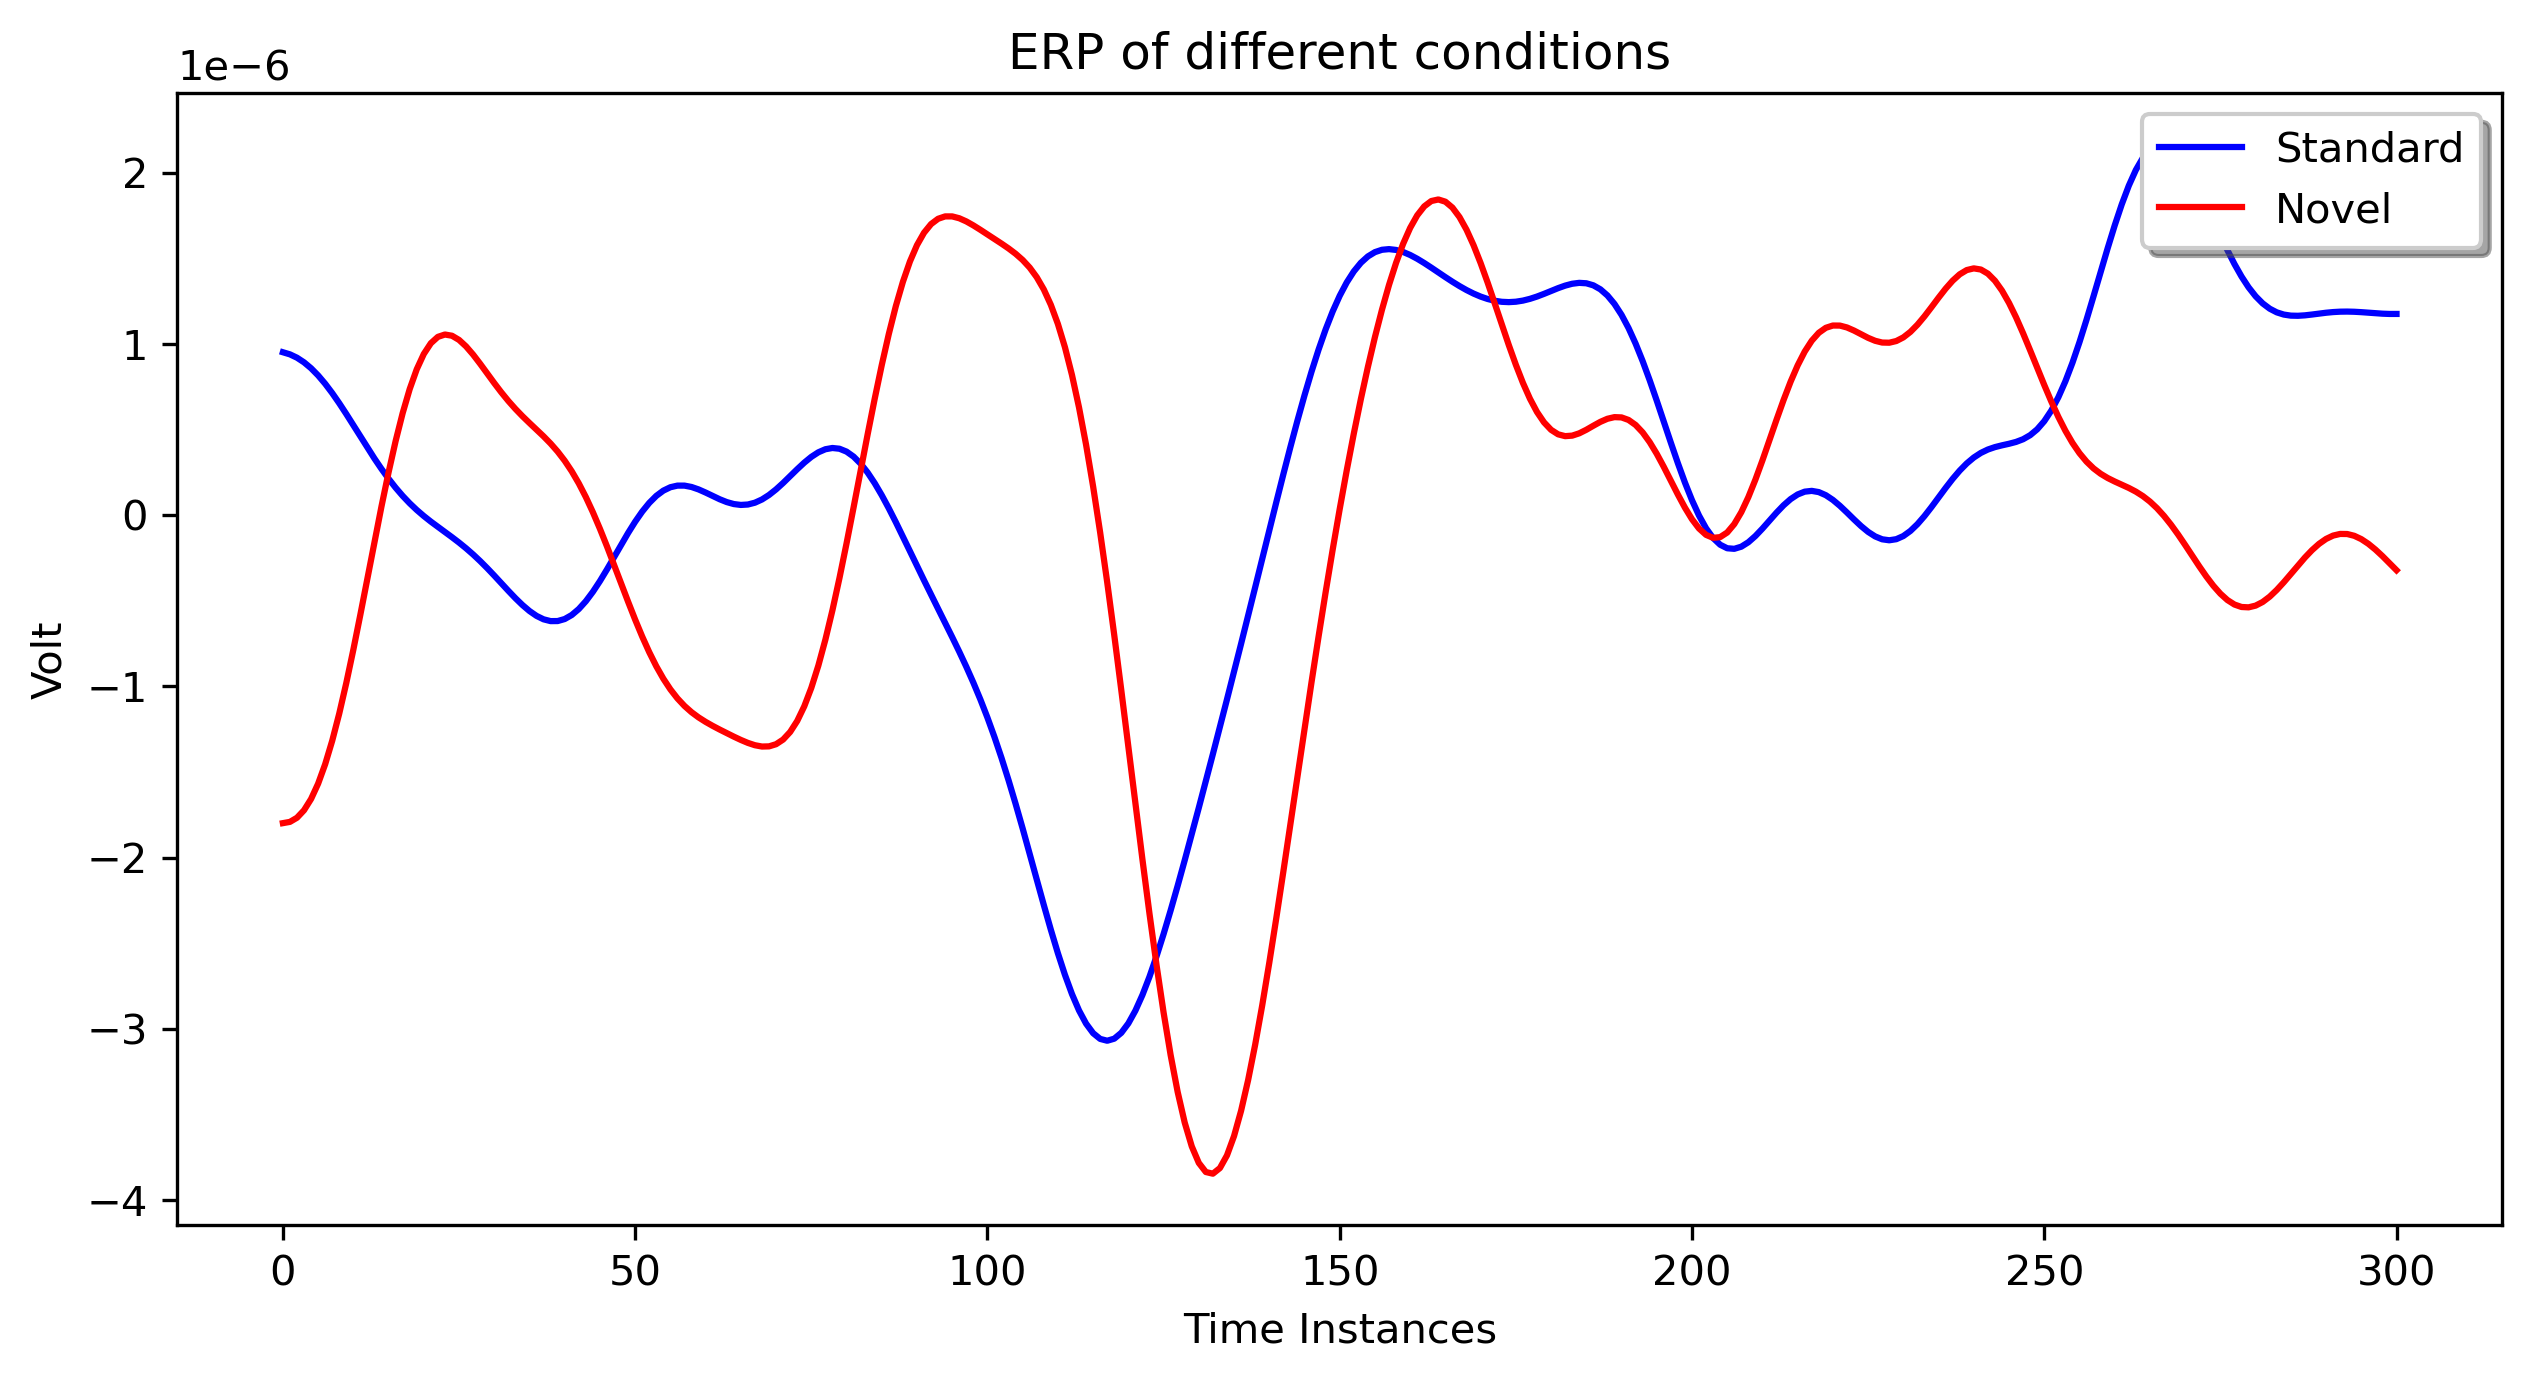

In [21]:
ep_std = epochs['Standard']
ep_nov = epochs['Novel']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.set_xlabel('Time Instances')
ax.set_ylabel('Volt')

# solution ...
ax.plot(ep_std.average()._data[channel_Cz, :], color='blue', label='Standard')
ax.plot(ep_nov.average()._data[channel_Cz, :], color='red', label='Novel')
# 

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
plt.title('ERP of different conditions')
plt.show()

## Topographic Maps
We can use a function from mne to plot the averaged neural data in a topographic map representation. We can specify one or multiple timepoints at which we would like to visualize the activation projected to the scalp.

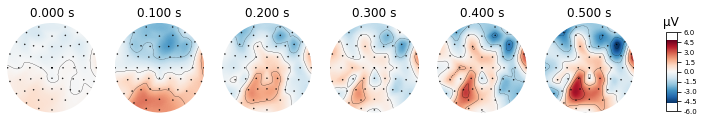

In [22]:
timepoints = np.arange(0, 0.51, 0.1)
epochs.average().plot_topomap(timepoints, ch_type='eeg'); 

### Exercise 7:

Use the plot_topomap function to visualize the activation for both conditions

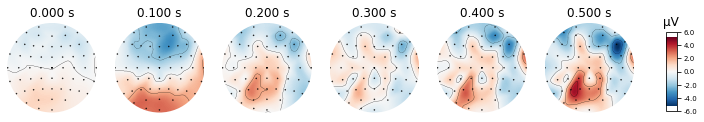

In [23]:
# solution
ep_std.average().plot_topomap(timepoints, ch_type='eeg');

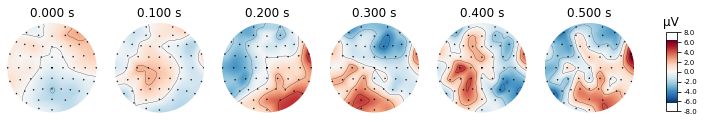

In [24]:
# solution
ep_nov.average().plot_topomap(timepoints, ch_type='eeg');

## Reference
This subchapter focuses on references and how much this could influence your data. 
### Exercise 8:
1. Make two copies of the original epochs object (copy.deepcopy(epochs)), called original_1 and original_2
2. Set the reference once to 'average' and once to the electrode 'Fz' (epochs.set_eeg_reference(ref)
3. Visualize the mean ERP for both of these cases (see Exercise 5)

In [25]:
# solution
original_1 = copy.deepcopy(epochs)
original_2 = copy.deepcopy(epochs)

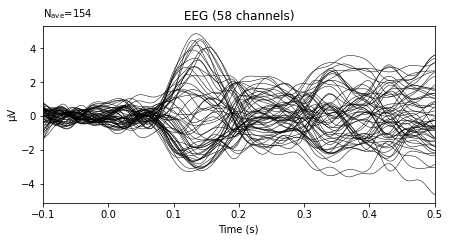

In [26]:
# solution
re_ref_epochs = original_1.set_eeg_reference('average')
re_ref_epochs.average().plot();

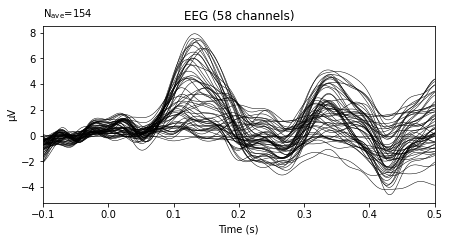

In [27]:
# solution
re_ref_epochs_2 = original_2.set_eeg_reference(['Fz'])
re_ref_epochs_2.average().plot();

Observe how different the data looks in these two representations. 

We can also look at the difference in each electrode seperately, here we look at CPz:

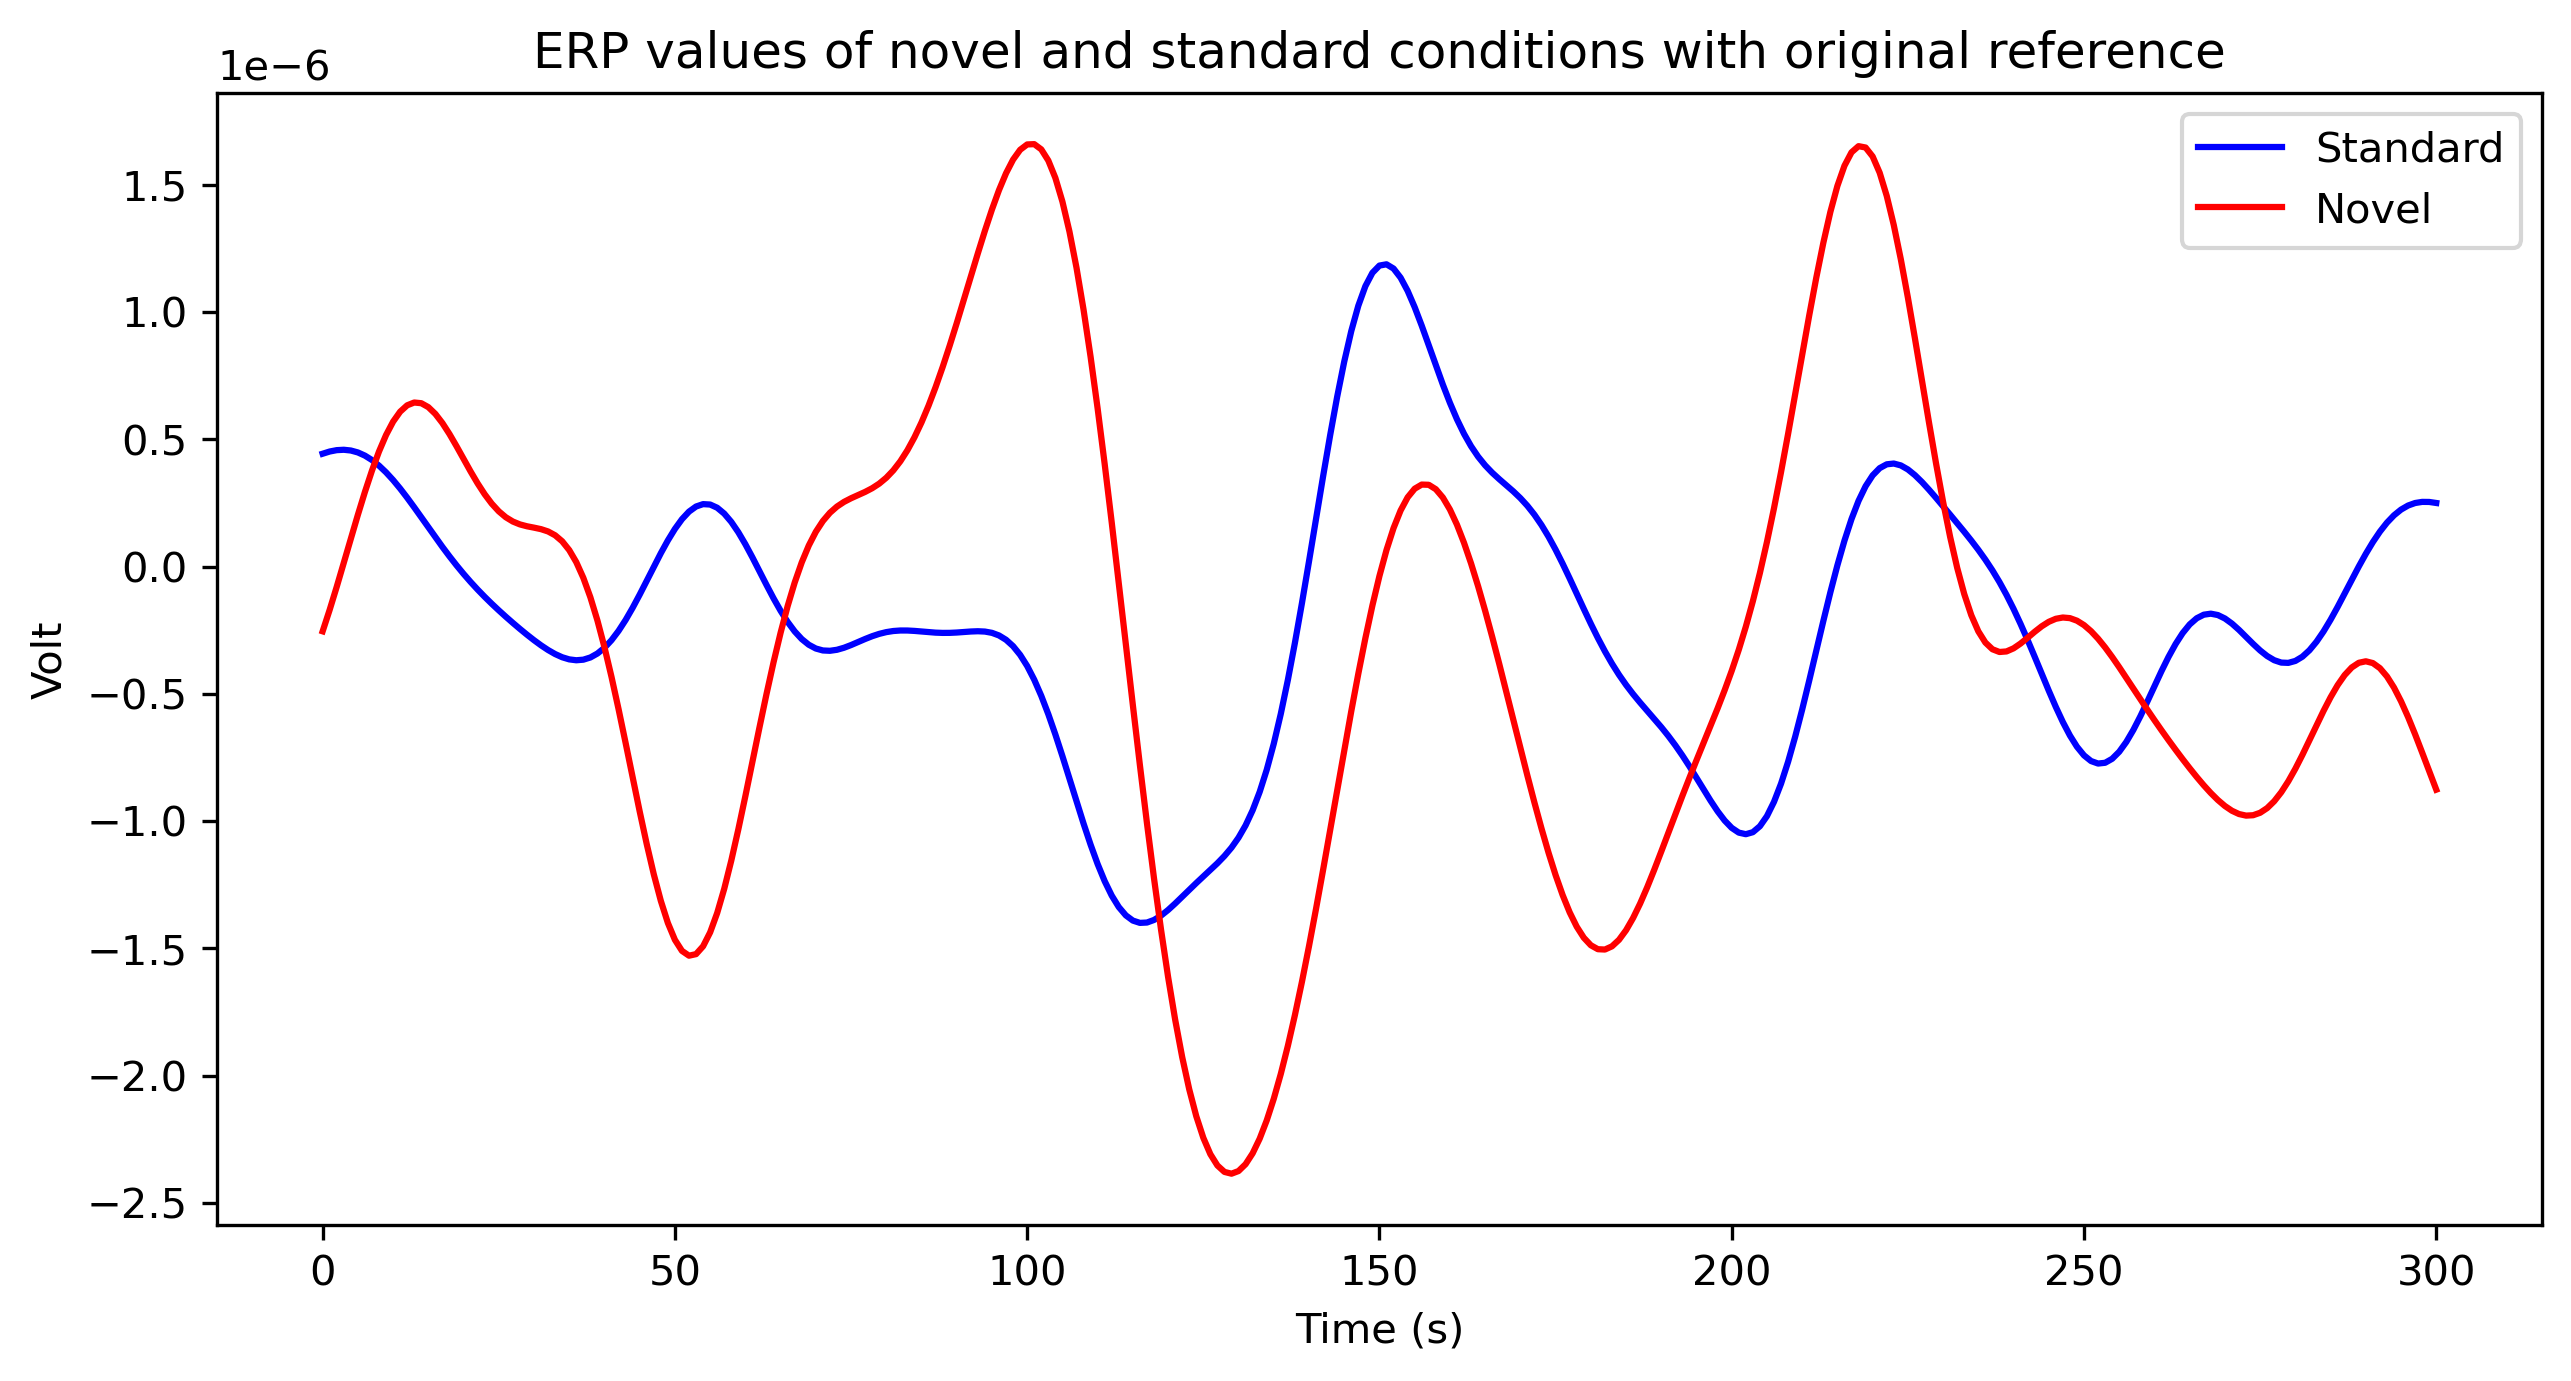

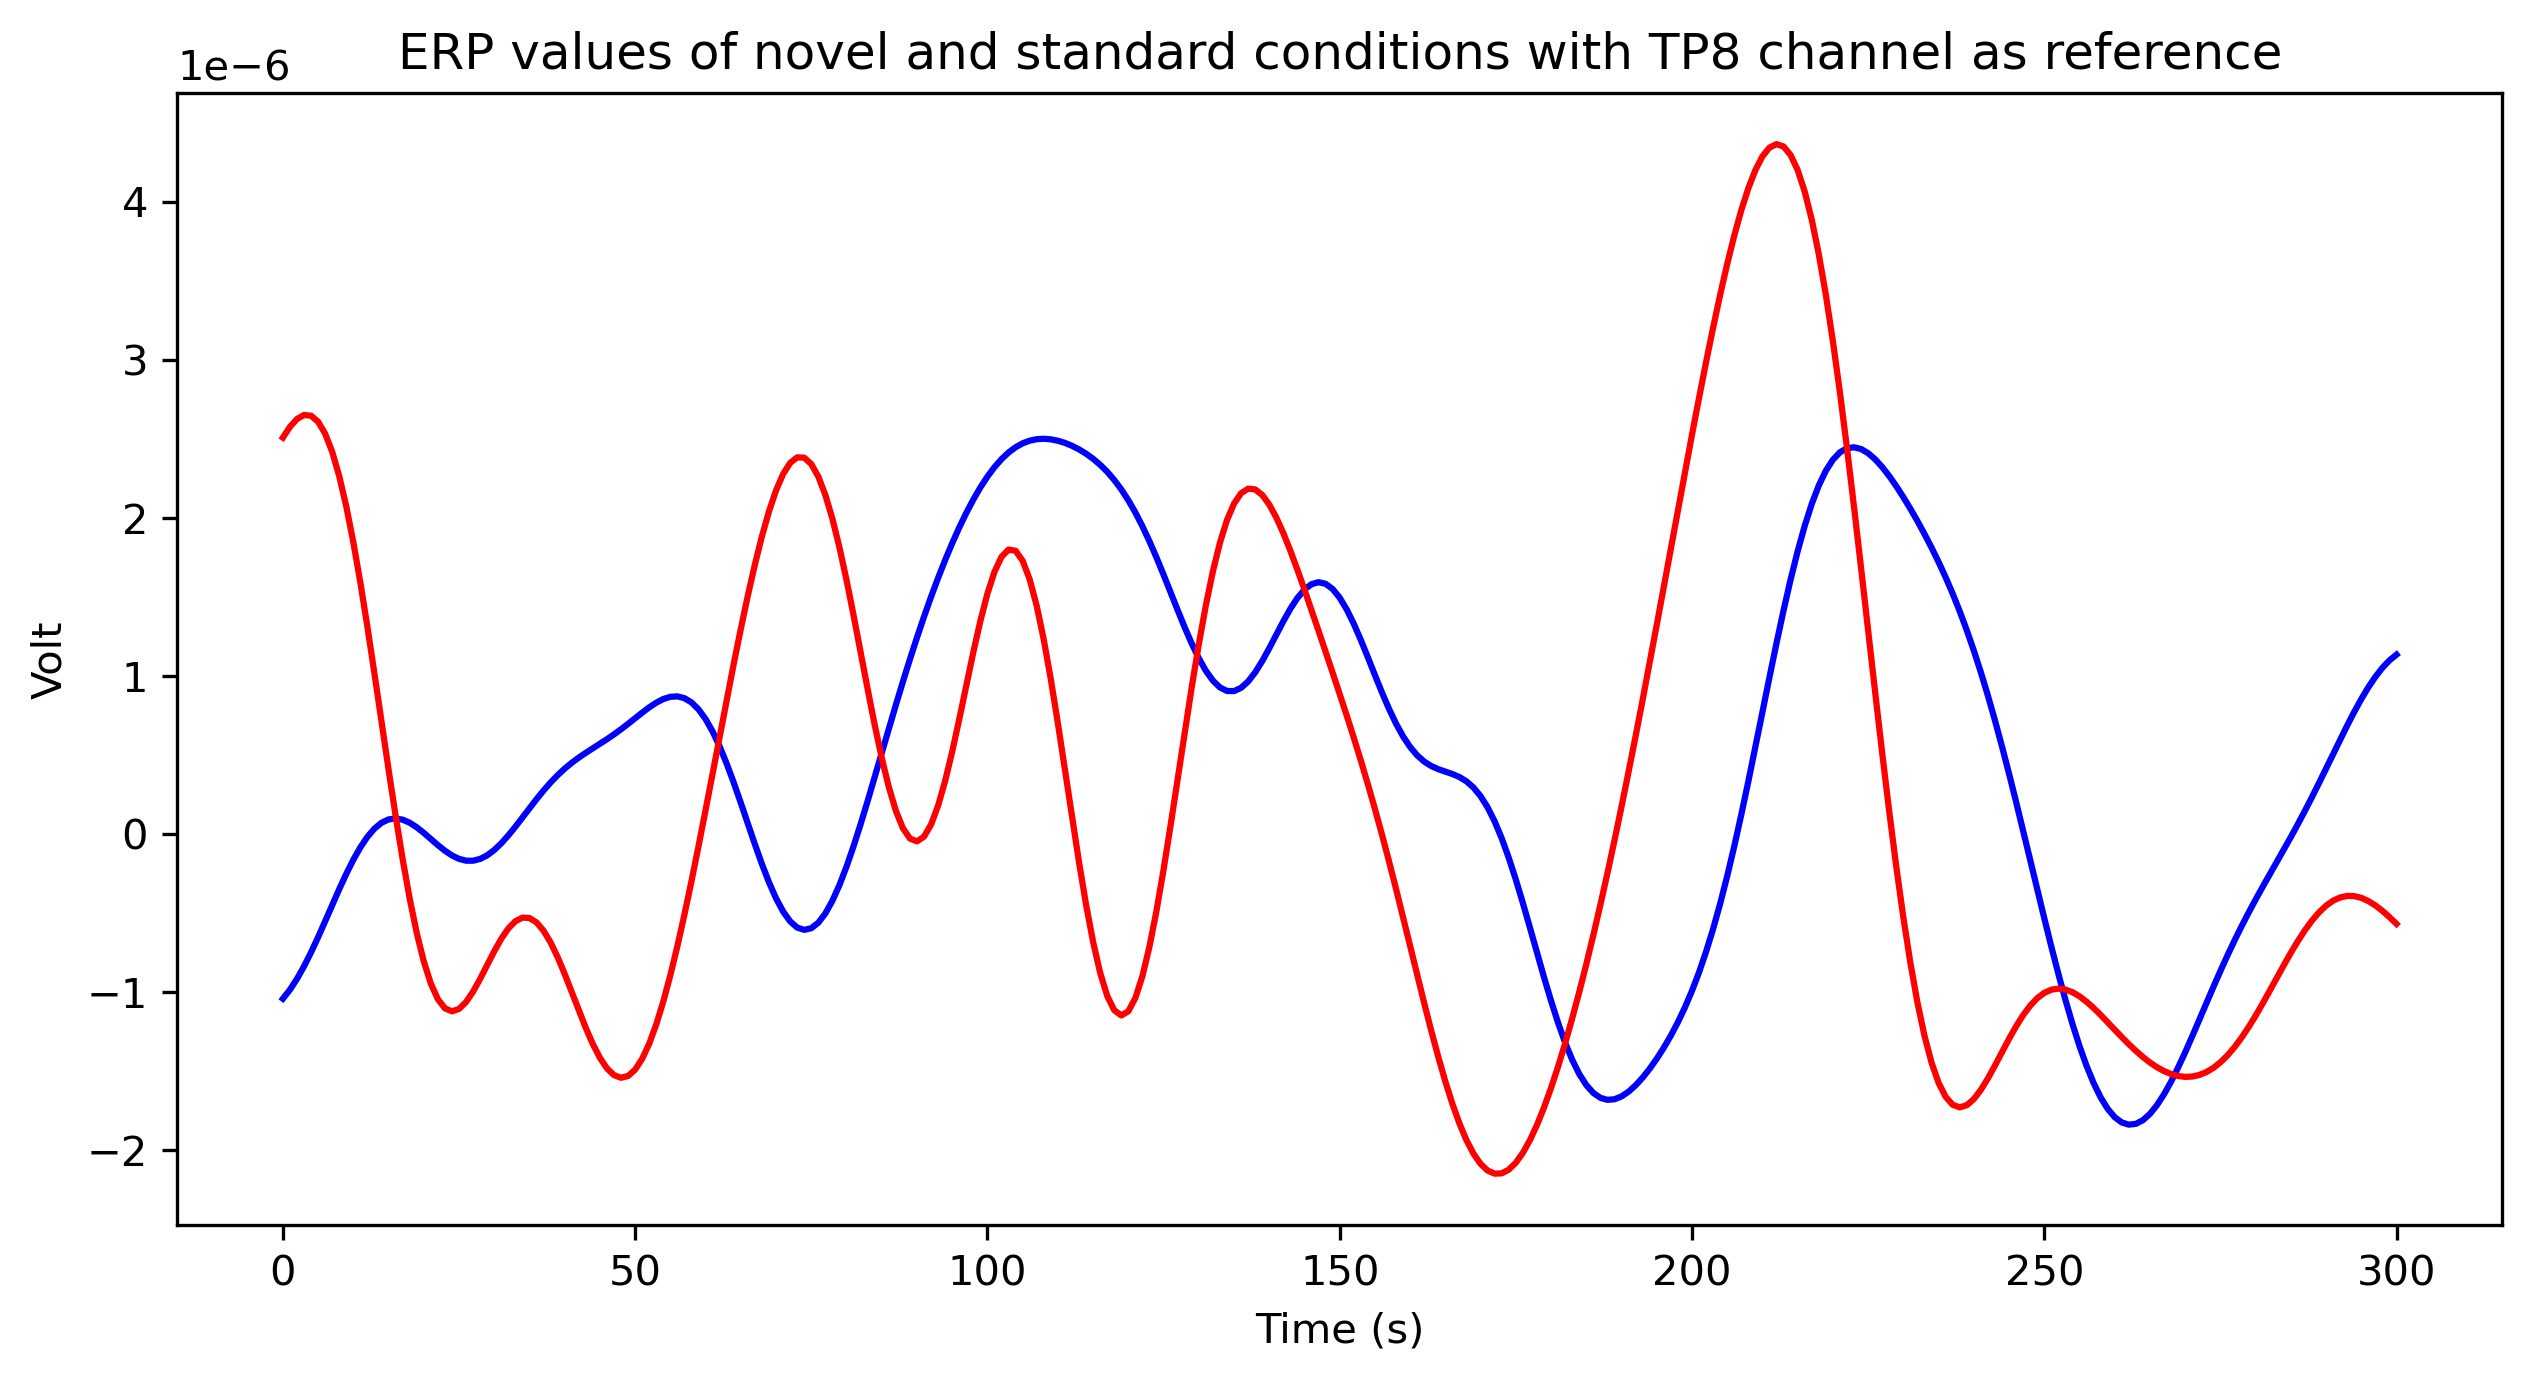

In [28]:
references = ['original', 'Oz']
channel_CPz = ch_names.index('CPz')

#Data with original reference
st_1 = original_1['Standard']
nv_1 = original_1['Novel']

#Data with Oz as the reference channel
st_2 = original_2['Standard']
nv_2 = original_2['Novel']

fig, ax = plt.subplots(figsize=(10, 5),  dpi=300)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Volt') 
ax.set_title('ERP values of novel and standard conditions with original reference')
ax.plot(st_1.average().get_data()[channel_CPz,:], color='blue', label='Standard')
ax.plot(nv_1.average().get_data()[channel_CPz,:], color='red', label='Novel')
ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(10, 5),  dpi=300)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Volt') 
ax.set_title('ERP values of novel and standard conditions with TP8 channel as reference')
ax.plot(st_2.average().get_data()[channel_CPz,:], color='blue', label='Standard')
ax.plot(nv_2.average().get_data()[channel_CPz,:], color='red', label='Novel')
plt.show()

The following exampe is not scientifically correct and this should not be used. It's purpouse is purely illustrative.

Let's test at every time point and every electrode, if the signal of the *Standard* and *Novel* trials are significantly different, with a simple t-test over all single trials. E.g. for electrode 0 and time point 0 we would test:

In [29]:
ttest_ind(original_1['Standard'].get_data()[:,0,0], original_1['Novel'].get_data()[:,0,0])

Ttest_indResult(statistic=1.7990019203533376, pvalue=0.07400233133037877)

If the p-value (at the second position) is bellow 0.05 we will consider it significant. 
Let's copy the evoked structure and replace the data with information about the significance of an electrode, i.e. we replace for the above example 
test_ep_1[0,0] with 0, as it was non significant.

We loop over all time points and electrodes, for the two different references:

In [30]:
significant_ep_1 = copy.deepcopy(evoked)

for i in range(len(times)):
    for ch in range(len(ch_names)):
        if ttest_ind(original_1['Standard'].get_data()[:,ch,i], 
                     original_1['Novel'].get_data()[:,ch,i])[1] < 0.05:
            significant_ep_1._data[ch, i] = 1
        else:
            significant_ep_1._data[ch, i] = 0

In [31]:
significant_ep_2 = copy.deepcopy(evoked)

for i in range(301):
    for ch in range(60):
        if ttest_ind(original_2['Standard'].get_data()[:,ch,i], 
                     original_2['Novel'].get_data()[:,ch,i])[1] < 0.05:
            significant_ep_2._data[ch, i] = 1
        else:
            significant_ep_2._data[ch, i] = 0

### Exercise 9:
Plot the topographic map representation of the two evoked objects, containing information about the significance of electrodes and time points

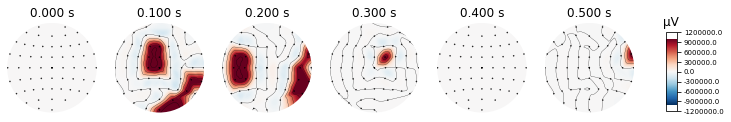

In [32]:
# solution
significant_ep_1.plot_topomap(timepoints, ch_type='eeg');

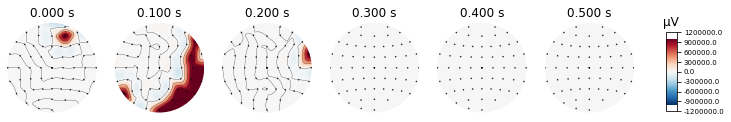

In [33]:
# solution
significant_ep_2.plot_topomap(timepoints, ch_type='eeg');